In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT+HOUSING_PATH+"/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [2]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
df = load_housing_data()

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BA49FA4198>,
      dtype=object)

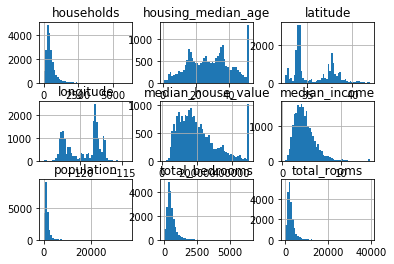

In [5]:
%matplotlib inline

df.hist(bins=50)

In [6]:
np.random.seed(1)
def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    nb_indices = int(len(data)*test_ratio)
    train_indices = shuffled_indices[nb_indices:]
    test_indices = shuffled_indices[:nb_indices]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(df, 0.2)


In [7]:
import sklearn.model_selection as sk
# make categories for the income
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"]<5, 5.0, inplace=True)
#df["income_cat"].hist(bins=4, width=0.25)
#print(df["income_cat"].value_counts())
train_set, test_set = sk.train_test_split(df, test_size=0.2, random_state = 1)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,NEAR BAY,3.0
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,NEAR BAY,3.0
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,INLAND,2.0
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,<1H OCEAN,2.0
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,<1H OCEAN,5.0


In [8]:
split = sk.StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=1)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [9]:
df["income_cat"].value_counts()/len(df)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [10]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [11]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [12]:
# Now we drop these extra categories from the train and test set
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [13]:
# Make a real copy of it
housing=strat_train_set.copy()
housing_labels=strat_train_set["median_house_value"].copy()

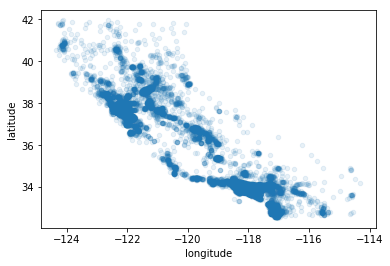

In [14]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

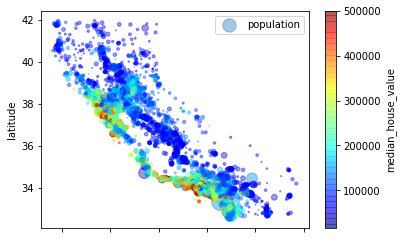

In [15]:
# Better plots:
housing.plot(kind='scatter', x='longitude', y='latitude', s=housing['population']/100, c='median_house_value',
             cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, label='population')

In [16]:
# Correlations:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BA4D40AA58>,
      dtype=object)

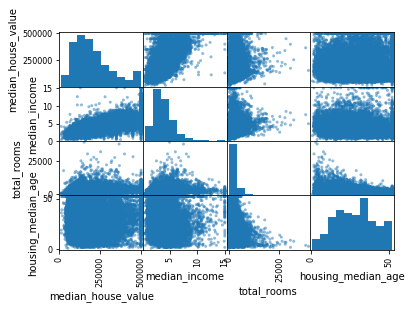

In [17]:
# Try a scatter matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes])

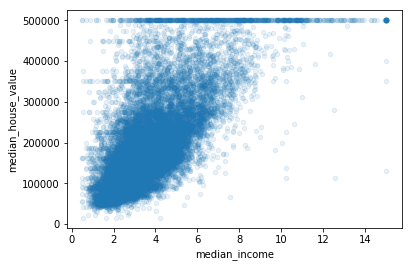

In [18]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
encoder = LabelEncoder()
housing_cat=housing["ocean_proximity"]
print(housing_cat.shape)
housing_cat_encoded=encoder.fit_transform(housing_cat)
print(housing_cat_encoded.shape)
encoder = OneHotEncoder()
housing_cat_encoded=encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
encoder = LabelBinarizer()
housing_cat_encoded=encoder.fit_transform(housing_cat)


(16512,)
(16512,)


In [20]:
housing_cat_encoded

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [21]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [22]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [24]:
# Declare all the pipelines
housing=housing.drop("median_house_value", axis=1)
housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs=["ocean_proximity"]
num_pipeline=Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs', CombinedAttributesAdder()),
    ('std', StandardScaler())
    ])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer())
])
cat2_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs))
])

# Chain pipelines
full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [25]:
housing_prepared = full_pipeline.fit_transform(housing)

In [26]:
"""Model testing"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
sd=housing.iloc[:5]
prepared = full_pipeline.transform(sd)
print("Predictions: ", lin_reg.predict(prepared))
print("Labels: ", list(housing_labels.iloc[:5]))
lin = np.sqrt(mean_squared_error(lin_reg.predict(housing_prepared), housing_labels))
print(lin)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
sd=housing.iloc[:5]
prepared = full_pipeline.transform(sd)
print("Predictions: ", tree_reg.predict(prepared))
print("Labels: ", list(housing_labels.iloc[:5]))
lin = np.sqrt(mean_squared_error(tree_reg.predict(housing_prepared), housing_labels))
print(lin)

Predictions:  [234956.84260842 303073.513104   327746.46204573 355932.30741583
 210220.50294171]
Labels:  [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]
68860.85279166883
Predictions:  [184000. 172200. 359900. 258200. 239100.]
Labels:  [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]
0.0


In [27]:
"""Cross validation"""
from sklearn.model_selection import cross_val_score
# Tree
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
# Linear
scoresLin = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scoresLin)

In [28]:
print(tree_rmse_scores)
print(tree_rmse_scores.mean())
print(tree_rmse_scores.std())
print(lin_rmse_scores)
print(lin_rmse_scores.mean())
print(lin_rmse_scores.std())

[71602.59914644 71852.74445869 71965.65183236 68764.1364754
 72211.05742265 66630.92278657 73033.97873726 71046.91276282
 72161.92973621 68993.10053309]
70826.30338914847
1918.141161381276
[70987.24786319 66375.29508519 73837.53789445 69493.59584642
 69821.05544742 69047.06162451 65908.72602507 66979.33032669
 73036.00622233 67077.50225384]
69256.33585891136
2610.121268165482


In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scoresForest = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scoresForest)
print(forest_rmse_scores)
print(forest_rmse_scores.mean())
print(forest_rmse_scores.std())

[53245.94125815 49641.08157677 51884.64379731 53231.23494274
 53210.74722296 51195.63703233 53420.53278374 50430.55832588
 56470.52374975 52563.57298553]
52529.44736751532
1809.423483354209


In [34]:
"""Fine tuning the model"""
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid=[{"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
            {"bootstrap": [False], "n_estimators": [3, 30], "max_features": [2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 30], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [31]:
cvrs=grid_search.cv_results_
for mean_score, params in zip(cvrs["mean_test_score"], cvrs["params"]):
    print(np.sqrt(-mean_score), params)

63793.33545101934 {'max_features': 2, 'n_estimators': 3}
55716.520016544244 {'max_features': 2, 'n_estimators': 10}
52631.26356252641 {'max_features': 2, 'n_estimators': 30}
60377.7022891777 {'max_features': 4, 'n_estimators': 3}
53019.73302273713 {'max_features': 4, 'n_estimators': 10}
50499.48580404248 {'max_features': 4, 'n_estimators': 30}
58812.429698498534 {'max_features': 6, 'n_estimators': 3}
52130.34007625578 {'max_features': 6, 'n_estimators': 10}
50345.88150160219 {'max_features': 6, 'n_estimators': 30}
58808.83039520586 {'max_features': 8, 'n_estimators': 3}
52527.592759389445 {'max_features': 8, 'n_estimators': 10}
50026.0946664124 {'max_features': 8, 'n_estimators': 30}
62405.03406585604 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
51807.716618301645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
60282.77580329844 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50707.22446616828 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [32]:
"""Apply the solution to the test set"""

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)


Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = np.sqrt(mean_squared_error(final_predictions, Y_test))
print(final_mse)

46966.59351148176


In [74]:
svrReg = SVR(C=1.0)
svrReg.fit(housing_prepared, housing_labels)
param_rd_grid = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }
randomSearch = RandomizedSearchCV(svrReg, param_rd_grid, n_iter=32, scoring="neg_mean_squared_error", verbose=2, n_jobs=8)
randomSearch.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done  96 out of  96 | elapsed:  9.4min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=32, n_jobs=8,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000BA6AA1B780>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000BA6AA6CEB8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [78]:
cvrs=randomSearch.cv_results_
for mean_score, params in zip(cvrs["mean_test_score"], cvrs["params"]):
    print(np.sqrt(-mean_score), params)
print(np.sqrt(-cvrs["mean_test_score"].max()))

71543.5175465528 {'C': 1126.9608861228257, 'gamma': 4.885132919288118, 'kernel': 'linear'}
116827.15004582996 {'C': 90.36458427897253, 'gamma': 1.0747812553827938, 'kernel': 'rbf'}
94199.8793702954 {'C': 637.5341725735295, 'gamma': 0.43619616964112645, 'kernel': 'rbf'}
65989.81888680276 {'C': 192348.01759011415, 'gamma': 1.7478248587977872, 'kernel': 'rbf'}
74837.19169440365 {'C': 44.69641264813223, 'gamma': 1.0201535562726887, 'kernel': 'linear'}
79021.82415739592 {'C': 13447.021522634197, 'gamma': 1.2267657098096962, 'kernel': 'rbf'}
71357.72568966432 {'C': 1800.263135828858, 'gamma': 0.18177494138742042, 'kernel': 'linear'}
88236.59059219307 {'C': 1012.5379065519619, 'gamma': 0.4098311307317185, 'kernel': 'rbf'}
117784.4626262791 {'C': 60.58362645618557, 'gamma': 1.2417353411174654, 'kernel': 'rbf'}
77348.54030639223 {'C': 27.990418167140305, 'gamma': 1.3926674164583555, 'kernel': 'linear'}
70806.11462261954 {'C': 32671.66806812172, 'gamma': 0.9642639825179126, 'kernel': 'linear'}
8

In [62]:
from sklearn.svm import SVR
from scipy.stats import *

In [87]:
some_data = housing.iloc[:4]
some_data.drop("ocean_proximity", axis=1, inplace=True)
print(some_data.shape)
some_labels = housing_labels.iloc[:4]
print("Predicted values: {}".format(randomSearch.predict(some_data)))
print("Actual values: {}".format(some_labels))

(4, 8)


C:\Users\Alexandre_Bondoux\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ValueError: X.shape[1] = 8 should be equal to 16, the number of features at training time